# Urban Sound Classification
Sample classifying audio samples from the Analytics Vidhya Urban Sound challenge.

Here we use the librosa package for much of the audio processing

In [32]:
import os
import random
import pandas as pd
import librosa
import librosa.display
import numpy as np
import glob 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


C:\Applications\Miniconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [42]:
train = pd.read_csv('train.csv')
train.head(10)

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
5,6,children_playing
6,10,street_music
7,11,drilling
8,12,gun_shot
9,15,dog_bark


Play an audio sample

In [11]:
#import IPython.display as ipd
#ipd.Audio('../data/Train/2022.wav')

Visualise a random sample

Class:  gun_shot


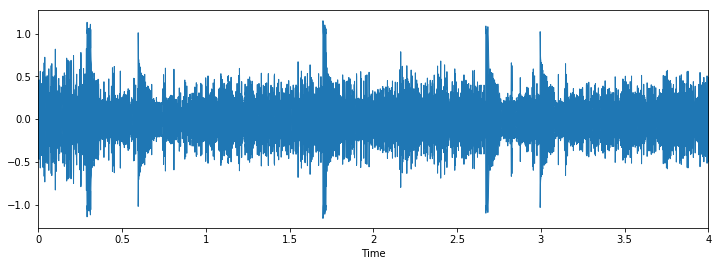

In [44]:
i = random.choice(train.ID)
#i = 5
audio_id = train.ID[i]
path = os.path.join('Data', 'Train', str(audio_id) + '.wav')

print('Class: ', train.Class[i])
x, sr = librosa.load(path)

mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T,axis=0) 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [22]:
train.Class.value_counts()

jackhammer          668
engine_idling       624
siren               607
street_music        600
dog_bark            600
children_playing    600
drilling            600
air_conditioner     600
car_horn            306
gun_shot            230
Name: Class, dtype: int64

Add mel-frequency cepstrum coefficient (MFCC) feature. MFC is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. 

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum. This frequency warping can allow for better representation of sound, for example, in audio compression.

In [26]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join('Data', 'Train', str(row.ID) + '.wav')

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None
 
   feature = mfccs
   label = row.Class
 
   return [feature, label]

temp = train.apply(parser, axis=1)
temp.columns = ['feature', 'label']

Error encountered while parsing file:  Data\Train\6.wav
Error encountered while parsing file:  Data\Train\17.wav
Error encountered while parsing file:  Data\Train\18.wav
Error encountered while parsing file:  Data\Train\19.wav
Error encountered while parsing file:  Data\Train\32.wav
Error encountered while parsing file:  Data\Train\33.wav
Error encountered while parsing file:  Data\Train\35.wav
Error encountered while parsing file:  Data\Train\42.wav
Error encountered while parsing file:  Data\Train\49.wav
Error encountered while parsing file:  Data\Train\61.wav
Error encountered while parsing file:  Data\Train\66.wav
Error encountered while parsing file:  Data\Train\72.wav
Error encountered while parsing file:  Data\Train\79.wav
Error encountered while parsing file:  Data\Train\80.wav
Error encountered while parsing file:  Data\Train\82.wav
Error encountered while parsing file:  Data\Train\87.wav
Error encountered while parsing file:  Data\Train\91.wav
Error encountered while parsing 

Error encountered while parsing file:  Data\Train\735.wav
Error encountered while parsing file:  Data\Train\738.wav
Error encountered while parsing file:  Data\Train\746.wav
Error encountered while parsing file:  Data\Train\749.wav
Error encountered while parsing file:  Data\Train\750.wav
Error encountered while parsing file:  Data\Train\751.wav
Error encountered while parsing file:  Data\Train\752.wav
Error encountered while parsing file:  Data\Train\753.wav
Error encountered while parsing file:  Data\Train\754.wav
Error encountered while parsing file:  Data\Train\766.wav
Error encountered while parsing file:  Data\Train\770.wav
Error encountered while parsing file:  Data\Train\776.wav
Error encountered while parsing file:  Data\Train\796.wav
Error encountered while parsing file:  Data\Train\798.wav
Error encountered while parsing file:  Data\Train\799.wav
Error encountered while parsing file:  Data\Train\801.wav
Error encountered while parsing file:  Data\Train\807.wav
Error encounte

Error encountered while parsing file:  Data\Train\1510.wav
Error encountered while parsing file:  Data\Train\1511.wav
Error encountered while parsing file:  Data\Train\1516.wav
Error encountered while parsing file:  Data\Train\1517.wav
Error encountered while parsing file:  Data\Train\1521.wav
Error encountered while parsing file:  Data\Train\1528.wav
Error encountered while parsing file:  Data\Train\1529.wav
Error encountered while parsing file:  Data\Train\1534.wav
Error encountered while parsing file:  Data\Train\1536.wav
Error encountered while parsing file:  Data\Train\1537.wav
Error encountered while parsing file:  Data\Train\1540.wav
Error encountered while parsing file:  Data\Train\1542.wav
Error encountered while parsing file:  Data\Train\1549.wav
Error encountered while parsing file:  Data\Train\1554.wav
Error encountered while parsing file:  Data\Train\1555.wav
Error encountered while parsing file:  Data\Train\1561.wav
Error encountered while parsing file:  Data\Train\1565.w

Error encountered while parsing file:  Data\Train\2150.wav
Error encountered while parsing file:  Data\Train\2157.wav
Error encountered while parsing file:  Data\Train\2160.wav
Error encountered while parsing file:  Data\Train\2162.wav
Error encountered while parsing file:  Data\Train\2168.wav
Error encountered while parsing file:  Data\Train\2169.wav
Error encountered while parsing file:  Data\Train\2170.wav
Error encountered while parsing file:  Data\Train\2180.wav
Error encountered while parsing file:  Data\Train\2182.wav
Error encountered while parsing file:  Data\Train\2184.wav
Error encountered while parsing file:  Data\Train\2191.wav
Error encountered while parsing file:  Data\Train\2196.wav
Error encountered while parsing file:  Data\Train\2204.wav
Error encountered while parsing file:  Data\Train\2205.wav
Error encountered while parsing file:  Data\Train\2209.wav
Error encountered while parsing file:  Data\Train\2217.wav
Error encountered while parsing file:  Data\Train\2218.w

Error encountered while parsing file:  Data\Train\2791.wav
Error encountered while parsing file:  Data\Train\2792.wav
Error encountered while parsing file:  Data\Train\2795.wav
Error encountered while parsing file:  Data\Train\2797.wav
Error encountered while parsing file:  Data\Train\2805.wav
Error encountered while parsing file:  Data\Train\2807.wav
Error encountered while parsing file:  Data\Train\2811.wav
Error encountered while parsing file:  Data\Train\2824.wav
Error encountered while parsing file:  Data\Train\2828.wav
Error encountered while parsing file:  Data\Train\2829.wav
Error encountered while parsing file:  Data\Train\2836.wav
Error encountered while parsing file:  Data\Train\2849.wav
Error encountered while parsing file:  Data\Train\2855.wav
Error encountered while parsing file:  Data\Train\2858.wav
Error encountered while parsing file:  Data\Train\2862.wav
Error encountered while parsing file:  Data\Train\2865.wav
Error encountered while parsing file:  Data\Train\2869.w

Error encountered while parsing file:  Data\Train\3481.wav
Error encountered while parsing file:  Data\Train\3483.wav
Error encountered while parsing file:  Data\Train\3486.wav
Error encountered while parsing file:  Data\Train\3495.wav
Error encountered while parsing file:  Data\Train\3501.wav
Error encountered while parsing file:  Data\Train\3508.wav
Error encountered while parsing file:  Data\Train\3510.wav
Error encountered while parsing file:  Data\Train\3514.wav
Error encountered while parsing file:  Data\Train\3515.wav
Error encountered while parsing file:  Data\Train\3519.wav
Error encountered while parsing file:  Data\Train\3523.wav
Error encountered while parsing file:  Data\Train\3529.wav
Error encountered while parsing file:  Data\Train\3534.wav
Error encountered while parsing file:  Data\Train\3536.wav
Error encountered while parsing file:  Data\Train\3546.wav
Error encountered while parsing file:  Data\Train\3547.wav
Error encountered while parsing file:  Data\Train\3550.w

Error encountered while parsing file:  Data\Train\4093.wav
Error encountered while parsing file:  Data\Train\4094.wav
Error encountered while parsing file:  Data\Train\4097.wav
Error encountered while parsing file:  Data\Train\4102.wav
Error encountered while parsing file:  Data\Train\4104.wav
Error encountered while parsing file:  Data\Train\4106.wav
Error encountered while parsing file:  Data\Train\4121.wav
Error encountered while parsing file:  Data\Train\4125.wav
Error encountered while parsing file:  Data\Train\4129.wav
Error encountered while parsing file:  Data\Train\4138.wav
Error encountered while parsing file:  Data\Train\4142.wav
Error encountered while parsing file:  Data\Train\4143.wav
Error encountered while parsing file:  Data\Train\4160.wav
Error encountered while parsing file:  Data\Train\4162.wav
Error encountered while parsing file:  Data\Train\4163.wav
Error encountered while parsing file:  Data\Train\4164.wav
Error encountered while parsing file:  Data\Train\4169.w

Error encountered while parsing file:  Data\Train\4789.wav
Error encountered while parsing file:  Data\Train\4801.wav
Error encountered while parsing file:  Data\Train\4805.wav
Error encountered while parsing file:  Data\Train\4807.wav
Error encountered while parsing file:  Data\Train\4826.wav
Error encountered while parsing file:  Data\Train\4832.wav
Error encountered while parsing file:  Data\Train\4835.wav
Error encountered while parsing file:  Data\Train\4839.wav
Error encountered while parsing file:  Data\Train\4840.wav
Error encountered while parsing file:  Data\Train\4842.wav
Error encountered while parsing file:  Data\Train\4843.wav
Error encountered while parsing file:  Data\Train\4844.wav
Error encountered while parsing file:  Data\Train\4852.wav
Error encountered while parsing file:  Data\Train\4853.wav
Error encountered while parsing file:  Data\Train\4858.wav
Error encountered while parsing file:  Data\Train\4860.wav
Error encountered while parsing file:  Data\Train\4866.w

Error encountered while parsing file:  Data\Train\5504.wav
Error encountered while parsing file:  Data\Train\5507.wav
Error encountered while parsing file:  Data\Train\5508.wav
Error encountered while parsing file:  Data\Train\5511.wav
Error encountered while parsing file:  Data\Train\5512.wav
Error encountered while parsing file:  Data\Train\5513.wav
Error encountered while parsing file:  Data\Train\5519.wav
Error encountered while parsing file:  Data\Train\5523.wav
Error encountered while parsing file:  Data\Train\5524.wav
Error encountered while parsing file:  Data\Train\5526.wav
Error encountered while parsing file:  Data\Train\5528.wav
Error encountered while parsing file:  Data\Train\5530.wav
Error encountered while parsing file:  Data\Train\5533.wav
Error encountered while parsing file:  Data\Train\5535.wav
Error encountered while parsing file:  Data\Train\5537.wav
Error encountered while parsing file:  Data\Train\5542.wav
Error encountered while parsing file:  Data\Train\5543.w

Error encountered while parsing file:  Data\Train\6193.wav
Error encountered while parsing file:  Data\Train\6211.wav
Error encountered while parsing file:  Data\Train\6214.wav
Error encountered while parsing file:  Data\Train\6217.wav
Error encountered while parsing file:  Data\Train\6219.wav
Error encountered while parsing file:  Data\Train\6220.wav
Error encountered while parsing file:  Data\Train\6222.wav
Error encountered while parsing file:  Data\Train\6227.wav
Error encountered while parsing file:  Data\Train\6232.wav
Error encountered while parsing file:  Data\Train\6239.wav
Error encountered while parsing file:  Data\Train\6248.wav
Error encountered while parsing file:  Data\Train\6249.wav
Error encountered while parsing file:  Data\Train\6258.wav
Error encountered while parsing file:  Data\Train\6259.wav
Error encountered while parsing file:  Data\Train\6262.wav
Error encountered while parsing file:  Data\Train\6263.wav
Error encountered while parsing file:  Data\Train\6270.w

Error encountered while parsing file:  Data\Train\6915.wav
Error encountered while parsing file:  Data\Train\6918.wav
Error encountered while parsing file:  Data\Train\6922.wav
Error encountered while parsing file:  Data\Train\6933.wav
Error encountered while parsing file:  Data\Train\6935.wav
Error encountered while parsing file:  Data\Train\6937.wav
Error encountered while parsing file:  Data\Train\6938.wav
Error encountered while parsing file:  Data\Train\6939.wav
Error encountered while parsing file:  Data\Train\6942.wav
Error encountered while parsing file:  Data\Train\6947.wav
Error encountered while parsing file:  Data\Train\6956.wav
Error encountered while parsing file:  Data\Train\6967.wav
Error encountered while parsing file:  Data\Train\6971.wav
Error encountered while parsing file:  Data\Train\6973.wav
Error encountered while parsing file:  Data\Train\6982.wav
Error encountered while parsing file:  Data\Train\6990.wav
Error encountered while parsing file:  Data\Train\6999.w

Error encountered while parsing file:  Data\Train\7597.wav
Error encountered while parsing file:  Data\Train\7599.wav
Error encountered while parsing file:  Data\Train\7610.wav
Error encountered while parsing file:  Data\Train\7612.wav
Error encountered while parsing file:  Data\Train\7618.wav
Error encountered while parsing file:  Data\Train\7636.wav
Error encountered while parsing file:  Data\Train\7650.wav
Error encountered while parsing file:  Data\Train\7653.wav
Error encountered while parsing file:  Data\Train\7655.wav
Error encountered while parsing file:  Data\Train\7656.wav
Error encountered while parsing file:  Data\Train\7664.wav
Error encountered while parsing file:  Data\Train\7665.wav
Error encountered while parsing file:  Data\Train\7669.wav
Error encountered while parsing file:  Data\Train\7671.wav
Error encountered while parsing file:  Data\Train\7680.wav
Error encountered while parsing file:  Data\Train\7685.wav
Error encountered while parsing file:  Data\Train\7686.w

Error encountered while parsing file:  Data\Train\8317.wav
Error encountered while parsing file:  Data\Train\8322.wav
Error encountered while parsing file:  Data\Train\8325.wav
Error encountered while parsing file:  Data\Train\8333.wav
Error encountered while parsing file:  Data\Train\8335.wav
Error encountered while parsing file:  Data\Train\8338.wav
Error encountered while parsing file:  Data\Train\8351.wav
Error encountered while parsing file:  Data\Train\8356.wav
Error encountered while parsing file:  Data\Train\8357.wav
Error encountered while parsing file:  Data\Train\8360.wav
Error encountered while parsing file:  Data\Train\8366.wav
Error encountered while parsing file:  Data\Train\8368.wav
Error encountered while parsing file:  Data\Train\8382.wav
Error encountered while parsing file:  Data\Train\8395.wav
Error encountered while parsing file:  Data\Train\8396.wav
Error encountered while parsing file:  Data\Train\8397.wav
Error encountered while parsing file:  Data\Train\8410.w

In [34]:
temp_bak = temp.copy(deep=True)
temp = temp.dropna()
print(temp.shape)

(3670, 2)


Create and train a basic model

In [35]:
X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [41]:
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Train on 2458 samples, validate on 1212 samples
Epoch 1/5
2458/2458 [==============================] - 1s 208us/step - loss: 12.7247 - acc: 0.1538 - val_loss: 11.0906 - val_acc: 0.2269
Epoch 2/5
2458/2458 [==============================] - 0s 94us/step - loss: 10.9051 - acc: 0.2384 - val_loss: 8.2608 - val_acc: 0.3375
Epoch 3/5
2458/2458 [==============================] - 0s 91us/step - loss: 9.3678 - acc: 0.2803 - val_loss: 5.6461 - val_acc: 0.4084
Epoch 4/5
2458/2458 [==============================] - 0s 87us/step - loss: 5.9982 - acc: 0.3214 - val_loss: 1.6806 - val_acc: 0.4942
Epoch 5/5
2458/2458 [==============================] - 0s 87us/step - loss: 2.7318 - acc: 0.3645 - val_loss: 1.6679 - val_acc: 0.4464
